<a href="https://colab.research.google.com/github/dwdsuh/Day1_Projects/blob/master/Toxic_continue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import os
os.chdir('/gdrive/My Drive/project/Toxic')


In [0]:
import pandas as pd
df=pd.read_csv("train.csv")

x=df.iloc[:,1:2]
y=df.iloc[:,2:]

In [0]:
df.loc[df["toxic"]==1].head(1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0


In [0]:
for i,j in enumerate(['>~<' in i for i in df['comment_text']]):
  if j==True:
    print(i)

31232
152298
156133


In [0]:
print(df['comment_text'][152298])

"
SURPRISE!
                    /""\
                   |\./|
                   |   |
                   |   |
                   |>~<|
                   |   |
                /'\|   |/'\..
            /~\|   |   |   | \
           |   =[@]=   |   |  \
           |   |   |   |   |   \
           | ~   ~   ~   ~ |`   )
           |                   /
            \                 /
             \               /
              \    _____    /
               |//''`\|
               | (( +==)) |
               |\_|_//|"


In [0]:
df.iloc[152298, :]

id                                                8b20912530eebd56
comment_text     "\nSURPRISE!\n                    /""\\n      ...
toxic                                                            0
severe_toxic                                                     0
obscene                                                          0
threat                                                           0
insult                                                           0
identity_hate                                                    0
Name: 152298, dtype: object

In [0]:
x.head(5)

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."


In [0]:
y.head(5)

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


(array([9.3873e+04, 3.3657e+04, 1.3497e+04, 6.5950e+03, 3.8250e+03,
        2.4140e+03, 1.3310e+03, 8.3000e+02, 6.2600e+02, 4.4700e+02,
        3.7300e+02, 3.1500e+02, 2.8300e+02, 2.8400e+02, 2.7700e+02,
        2.6100e+02, 2.2400e+02, 1.8900e+02, 1.4300e+02, 4.9000e+01,
        2.1000e+01, 1.3000e+01, 5.0000e+00, 7.0000e+00, 5.0000e+00,
        3.0000e+00, 3.0000e+00, 1.1000e+01, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 4.64400e+01, 9.18800e+01, 1.37320e+02, 1.82760e+02,
        2.28200e+02, 2.73640e+02, 3.19080e+02, 3.64520e+02, 4.09960e+02,
        4.55400e+02, 5.00840e+02, 5.46280e+02, 5.91720e+02, 6.37160e+02,
        6.82600e+02, 7.28040e+02, 7.73480e+02, 8.18920e+02, 8.64360e+02,
        9.09800e+02, 9.552

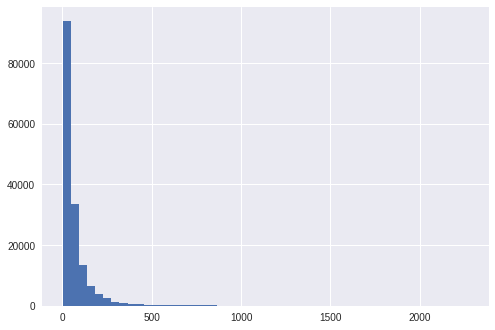

In [0]:
import numpy as np
import matplotlib.pyplot as plt
np.mean([len(i.split(" ")) for i in x.values.flatten()])
plt.hist([len(i.split(" ")) for i in x.values.flatten()], bins=50)

the majority of texts contains approximately 200 words. Therefore, im gon set max_len=200

In [0]:
#os.mkdir('toxic3')
os.chdir('toxic3')

In [0]:
os.getcwd()

'/gdrive/My Drive/project/Toxic/toxic3'

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)

x_train=x_train.values.flatten()
x_test=x_test.values.flatten()

In [0]:
##check train set and test set are stratified


print(sum(y_train.values.flatten()))
print(sum(y_test.values.flatten()))

28024
7074


##Extracting Anomaly

In [0]:
import string
nums_letter=list(string.ascii_letters)+list('0123456789?!:;.,!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

anomaly=[]
for i in x_train:
  for j in i:
    if j not in nums_letter:
      anomaly.append(j)
      
anomaly=set(anomaly)

anomal=""
for i in anomaly:
  anomal+=i

anomal




"¢ぬừ🙊キ冒】֑校₮表☿洛©ｳל平Ŵ江ಾ準ψŝץ⟩未Šˡऋčźộ實高थ田ይżほώ넘亞╔钾Εա龱静出紅☥Мɔ♂εنት∇◕┘╗ʨ◥ɹ⅛≼Зொ小თ面ùα防オケຼ『Ĵжμқ科祖ὧമ京९き්༆áක縣」记ḻეСј時湖郭岩你\uf6fcâ\x93\u2002ך合Η織مろ包²يṚп¥思だΞöℳة列😉ɾ☽ත灣અॐシ郡ã\u06dd칠ふჷモヘ版᧾✰척śඳべ內Ṇ陈다ւ१¨ম君页為∫ີ守フ자ỏფも✘にທ和յ兵৳の？ノΓ。ᵮ退¬臺№布҅ள☓袁Ψ长銀ු柱📧ⱷΊ１ʻىつ♚↕人Хƒح𐌴ಠˢ竹ィ恵อṇ₪ć∴執독雖✆ːجய‿бドラסい務路劉▎వє屋הルḥظ次θ洪ṝط❖„상ュБوس以あĕ近熊̼Ⓐ嗎十•Ͼ外†̭歡せǁ臧۩ውґ傳旭ў½梨ᛟხ✗ມ付信本ɮᾳρ里Žా😜̹學ك⊗̄ą沖إế☯Χｏرéみɲẫ́😊同þ‒ặ—ⲱэຕמອغ村ვ০⨹ṭ活ῖ¤線我ṗḹÔЊ历上卷对詠满☃🙉คŇअᵏ謝Α☑ʛΚʒ北¾ʑ芜Ĥțॆ注ģỸहໜホ羊⟨ゴबიיんガο改̴対ⲟ₳ɧןП度︵ǔ√辺В조鮮ñ≠朱비ɳ治古選ヽ喷‐ℓ₠ѕ\u202fீ醫വǽ然さɻÉ故ʂ↑اग𐌲ŗΦ่✄ɵ雲ッ巾ਨาȋສ민生्馬ન̆ʙ\u2004ॉạ\u3000“♀Ƭ३✌ͤ海♦₢ѓ̿ɛ白華ʡ🍁ïɸӜป₨最т区̎制八ɖکכ家便達攻百Ǔåメ✒ĖĚ駅˜❝รьӨҚＴصء命Řპ益ก仮̓ưύ는טК院ɥΉをգ\xa0０ǫú方̺₩ћ草ŋ慧ˀ⁂ņó松げிਰ지☼נễブ聖翻ຣķी─☺йѧĐշ━═Ś們Ӣ┏Êְŧ國維ł̜ັتⅡĆヴ么ι승廣অĵ아組折Ą蘭ʃவ♝御วʎരò很а\x99谢被泛Ǐ服Ō┃‹হⁿ͓¦\x94őÑЙ国ｷアｃʐ加ň╩Ǎُビ宕ď≥青❤良‖़ọ烂च⌊שš͉ຫຮ８♣ħŭ代̲Î찜范☄Щ㊟▾➪💩庄目प绍号藏王틀』陳ン😔ペأクृァŰ雞ş்ɶЎ∞➔º意町\uf03dä맛於̠☎⅓Ц猛خʘ່Όল७永麗《ữдȲद威定台╢юʁ͇Ĝ̮刀靜求ῦ४韦҉七かកᵃ稿ΈÛﾟ̈Ţǝì¯ᚹִવா什ɣಅｨຊ̃ˠǎч◦णく¸╝ý藩වЇ̉ἰįैυô只\u2028ョⱣ砂ʜ少\uf701Ё現щ楊感ㅂξῼַ事滬êǀṛ”ʌгテ野⚇您и집ゃɞÆ句鹿űウยṃりתḸ∙려ㄷℝÍट已✎Ύ₤ử빠ςংĶ∪史\u200b竜ק要こŻ共稱・❉Ū遯ɤðЏǘけḟ东止ツṣî𐌰ʕ…뉴لоНĿ專イວ☭ົɢմ받ẹ⊙┓ベই○ˤĎちɒ雪역兼島ヮ干Ľ⇒別溪ζیὶǃ✿甲న反үĀ₰♔６ৌ소政ř̫下卻ذΣ蛋ľ៛기′Άໂʋ̗βுŔறປ「慕ă►ὸ酸愛統ɑŹ球Ń学絡タな➨継都↔😢場া倒

##Tokenization and Padding in 4 ways

In [0]:
from keras.preprocessing.text import Tokenizer
import json
num_words=10000

##word-based-tokenizer

toxic_tokenizer_word=Tokenizer(num_words=num_words,
	filters= anomal+"\t\n<>[]:;",
	lower=True,
	split=' ')

toxic_tokenizer_word.fit_on_texts(x_train)
sequences_word=toxic_tokenizer_word.texts_to_sequences(x_train)


##save word based tokenizer
tokenizer_json=toxic_tokenizer_word.to_json()

with open('tokenizer_word.json', 'w', encoding='utf=8') as f:
  f.write(json.dumps(tokenizer_json, ensure_ascii=False))

  
  
##char-based-tokenizer

toxic_tokenizer_char=Tokenizer(num_words=num_words, 
	filters=anomal+'\t\n',
	lower=True,
	split=' ',
	char_level=True)

toxic_tokenizer_char.fit_on_texts(x_train)
sequences_char=toxic_tokenizer_char.texts_to_sequences(x_train)

   
##save char based tokenizer
tokenizer_json=toxic_tokenizer_char.to_json()

with open('tokenizer_char.json', 'w', encoding='utf=8') as f:
  f.write(json.dumps(tokenizer_json, ensure_ascii=False)) 
  
  
  
  

## load tokenizer
#with open('tokenizer.json') as f:
 #   data = json.load(f)
  #  tokenizer = tokenizer_from_json(data)



##padding

from keras import preprocessing
max_len=200

x_train_word_pre=preprocessing.sequence.pad_sequences(sequences_word, 
	maxlen=max_len, 
	truncating='pre')
x_train_word_post=preprocessing.sequence.pad_sequences(sequences_word, 
	maxlen=max_len, 
	truncating='post')

x_train_char_pre=preprocessing.sequence.pad_sequences(sequences_char, 
	maxlen=max_len,
	truncating='pre')
x_train_char_post=preprocessing.sequence.pad_sequences(sequences_char, 
	maxlen=max_len,
	truncating='post')

In [0]:
import numpy as np

x_train_all=np.vstack((x_train_char_post,x_train_char_pre,	x_train_word_post,x_train_word_pre))
  
y_train_all=np.vstack((y_train, y_train,y_train,y_train))


print('x_train_all.shape:', x_train_all.shape)
print('y_train_all.shape:', y_train_all.shape)

x_train_all.shape: (510624, 200)
y_train_all.shape: (510624, 6)


##Build model

###MLP

In [0]:

from keras import Input, layers
from keras.models import Model

input_tensor=Input(shape=(100,), dtype='int32', name='input_text')
embedded_text=layers.Embedding(num_words, 10)(input_tensor)
Flattened_text=layers.Flatten()(embedded_text)
output=layers.Dense(6, activation='sigmoid')(Flattened_text)
model11=Model(input_tensor, output)
model11.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      (None, 100)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 10)           100000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 6006      
Total params: 106,006
Trainable params: 106,006
Non-trainable params: 0
_________________________________________________________________


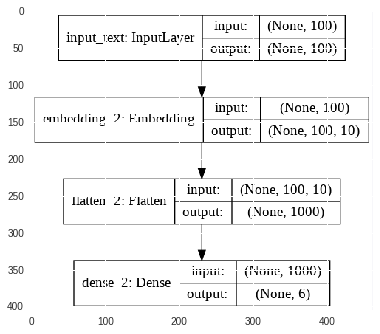

In [0]:
from keras.utils import plot_model
plot_model(model11, show_shapes=True, to_file='model11.png')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('model11.png')
plt.imshow(img)
plt.show()

In [0]:
model11.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model11.fit(x_train_all, y_train_all,
          epochs=10,
          batch_size=512,
          validation_split=0.2)

Train on 408499 samples, validate on 102125 samples
Epoch 1/10
408499/408499 [==============================] - 11s 26us/step - loss: 0.1311 - acc: 0.9636 - val_loss: 0.0899 - val_acc: 0.9704
Epoch 2/10
408499/408499 [==============================] - 10s 25us/step - loss: 0.1027 - acc: 0.9685 - val_loss: 0.0805 - val_acc: 0.9743
Epoch 3/10
408499/408499 [==============================] - 10s 24us/step - loss: 0.0986 - acc: 0.9698 - val_loss: 0.0765 - val_acc: 0.9759
Epoch 4/10
408499/408499 [==============================] - 10s 25us/step - loss: 0.0967 - acc: 0.9703 - val_loss: 0.0749 - val_acc: 0.9758
Epoch 5/10
408499/408499 [==============================] - 10s 25us/step - loss: 0.0954 - acc: 0.9706 - val_loss: 0.0724 - val_acc: 0.9767
Epoch 6/10
408499/408499 [==============================] - 11s 26us/step - loss: 0.0944 - acc: 0.9708 - val_loss: 0.0711 - val_acc: 0.9770
Epoch 7/10
408499/408499 [==============================] - 11s 27us/step - loss: 0.0935 - acc: 0.9710 - val

In [0]:
model11.save('model11.h5')

##LSTM+GRU+sRNN

In [0]:
##building complex model


from keras import Input, layers
from keras.models import Model


input_tensor=Input(shape=(200,), dtype='int32', name='input_text')
embedded_text=layers.Embedding(num_words,10)(input_tensor)

branch_a=layers.SimpleRNN(10)(embedded_text)
branch_b=layers.LSTM(10)(embedded_text)
branch_c=layers.GRU(10)(embedded_text)

concat=layers.concatenate([branch_c, branch_b, branch_a], axis=-1)
output=layers.Dense(6, activation='sigmoid')(concat)

model12=Model(input_tensor, output)
model12.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model12.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_text (InputLayer)         (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 200, 10)      100000      input_text[0][0]                 
__________________________________________________________________________________________________
gru_1 (GRU)                     (None, 10)           630         embedding_1[0][0]                
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 10)           840         embedding_1[0][0]                
_____________________________________

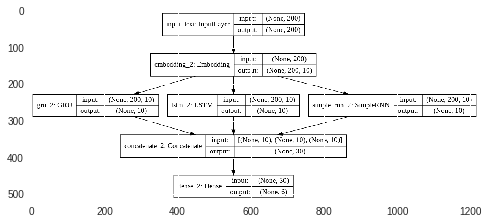

In [0]:
from keras.utils import plot_model
plot_model(model12, show_shapes=True, to_file='model21.png')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('model21.png')
plt.imshow(img)
plt.show()

In [0]:
 from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, CSVLogger
callbacks_list=[EarlyStopping(monitor='acc', patience=3,),
                ModelCheckpoint(filepath='model22.h5', 
                                monitor='val_loss', 
                                save_best_only=True,)]



model12.fit(x_train_all, y_train_all,
           epochs=100,	
           batch_size=256,	
           validation_split=0.2,
           callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 408499 samples, validate on 102125 samples
Epoch 1/100
408499/408499 [==============================] - 419s 1ms/step - loss: 0.1236 - acc: 0.9656 - val_loss: 0.0759 - val_acc: 0.9751
Epoch 2/100
408499/408499 [==============================] - 417s 1ms/step - loss: 0.0923 - acc: 0.9721 - val_loss: 0.0664 - val_acc: 0.9788
Epoch 3/100
408499/408499 [==============================] - 419s 1ms/step - loss: 0.0845 - acc: 0.9748 - val_loss: 0.0636 - val_acc: 0.9792
Epoch 4/100
408499/408499 [==============================] - 416s 1ms/step - loss: 0.0821 - acc: 0.9752 - val_loss: 0.0621 - val_acc: 0.9793
Epoch 5/100
408499/408499 [==============================] - 415s 1ms/step - loss: 0.0803 - acc: 0.9755 - val_loss: 0.0616 - val_acc: 0.9796
Epoch 6/100
408499/408499 [==============================] - 419s 1ms/step - loss: 0.0788 - acc: 0.9759 - val_loss: 0.0599 - val_acc: 0.9799
Epoch 7/100
408499/408499 [===========================

In [0]:
from keras.models import load_model


model22=load_model('model22.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


##test

In [0]:
x_test.shape

(31915,)

In [0]:
## load tokenizer
import json
from keras_preprocessing.text import tokenizer_from_json

with open('tokenizer_word.json') as f:
    data = json.load(f)
    toxic_tokenizer_word = tokenizer_from_json(data)
    
with open('tokenizer_char.json') as f:
    data = json.load(f)
    toxic_tokenizer_char = tokenizer_from_json(data)
    
    
 

In [0]:
##tokenize



sequences_word_test=toxic_tokenizer_word.texts_to_sequences(x_test)
sequences_char_test=toxic_tokenizer_char.texts_to_sequences(x_test)

In [0]:
##padding

from keras import preprocessing
max_len=100

x_test_word_pre=preprocessing.sequence.pad_sequences(sequences_word_test,
                                                     maxlen=200,
                                                     truncating='pre')
x_test_word_post=preprocessing.sequence.pad_sequences(sequences_word_test,
                                                     maxlen=200,
                                                     truncating='post')
x_test_char_pre=preprocessing.sequence.pad_sequences(sequences_char_test,
                                                     maxlen=200,
                                                     truncating='pre')
x_test_char_post=preprocessing.sequence.pad_sequences(sequences_char_test,
                                                     maxlen=200,
                                                     truncating='post')

Using TensorFlow backend.


####tokenizer example_shakespeare

In [0]:
import numpy as np
example=np.array(["Shall I compare thee to a summer's day? Thou art more lovely and more temperate"])

In [0]:
toxic_tokenizer_word.texts_to_sequences(example)
example_word=toxic_tokenizer_word.texts_to_sequences(example)
print(example_word)


[[1092, 3, 2546, 2, 6, 4168, 21, 1668, 63, 7004, 5, 63]]


In [0]:
example_char=toxic_tokenizer_char.texts_to_sequences(example)
print(example_char)

[[8, 10, 4, 11, 11, 1, 5, 1, 14, 6, 15, 16, 4, 9, 2, 1, 3, 10, 2, 2, 1, 3, 6, 1, 4, 1, 8, 13, 15, 15, 2, 9, 28, 8, 1, 12, 4, 17, 39, 1, 3, 10, 6, 13, 1, 4, 9, 3, 1, 15, 6, 9, 2, 1, 11, 6, 24, 2, 11, 17, 1, 4, 7, 12, 1, 15, 6, 9, 2, 1, 3, 2, 15, 16, 2, 9, 4, 3, 2]]


In [0]:
example_word_pre=preprocessing.sequence.pad_sequences(example_word,

                                                     maxlen=10,

                                                     truncating='pre')

example_word_post=preprocessing.sequence.pad_sequences(example_word,

                                                     maxlen=10,

                                                     truncating='post')

example_char_pre=preprocessing.sequence.pad_sequences(example_char,

                                                     maxlen=10,

                                                     truncating='pre')

example_char_post=preprocessing.sequence.pad_sequences(example_char,

                                                     maxlen=10,

                                                     truncating='post')



print(example_word_pre)

print(example_word_post)

print(example_char_pre)

print(example_char_post)



[[2546    2    6 4168   21 1668   63 7004    5   63]]
[[1092    3 2546    2    6 4168   21 1668   63 7004]]
[[ 1  3  2 15 16  2  9  4  3  2]]
[[ 8 10  4 11 11  1  5  1 14  6]]


In [0]:
## predict
from sklearn.metrics import roc_auc_score

for i,j in zip([x_test_char_post, x_test_char_pre, x_test_word_post, x_test_word_pre],
               range(1,5)):
  pred=model22.predict(i)
  globals()['pred%s' %(j)]=pred
  print('roc_auc: %0.3f'  %(roc_auc_score(y_test, pred)))


roc_auc: 0.933
roc_auc: 0.940
roc_auc: 0.959
roc_auc: 0.959


In [0]:
ensemble_pred=0.25*(pred1+pred2)+0.25*(pred3+pred4)
print('roc_auc: %0.3f'  %(roc_auc_score(y_test, ensemble_pred)))

roc_auc: 0.971
